<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Đồ án thực hành Cuối kỳ - Nhập môn Khoa học Dữ liệu  
</div>

### Giảng viên hướng dẫn:
- Thầy Lê Nhựt Nam
- Cô Nguyễn Thị Thu Hằng
- Thầy Trần Quốc Huy
### Thông tin nhóm: Nhóm 23
| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Phan Cao Nguyên       | 21120299  |
| Nguyễn Phương    Thảo | 21120336  |

### Chủ đề: Heart Attack Analysis & Prediction


<div style="text-align: left; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 5px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Pha 02 – Xây dựng mô hình dữ liệu và đánh giá 📌
</div>

Thêm các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ***Bài toán***
### Dự đoán tỉ lệ tử vong có yếu tố tăng huyết áp cục bộ

- **Input:** Các thông tin về yếu tố địa lý (cấp bang), năm, nhóm tuổi, chủng tộc/ sắc tộc và giới tính

- **Output:** Tỉ lệ tử vong (/100000 dân).

# I. Tiền xử lý dữ liệu

In [ ]:
smoothed_df = pd.read_csv('Data/smoothed_rate_df.csv')
smoothed_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
0,1001,2000,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,76.9,61.5,99.6
1,1001,2001,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,83.4,69.0,126.7
2,1001,2002,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,86.2,66.7,122.1
3,1001,2003,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,81.6,58.5,117.0
4,1001,2004,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,84.7,63.7,114.6
...,...,...,...,...,...,...,...,...,...,...,...,...
472647,51053,2017,VA,Dinwiddie,Ages 65+ years,Black,Overall,-77.632205,37.076015,338.8,286.0,402.8
472648,51053,2018,VA,Dinwiddie,Ages 65+ years,Black,Overall,-77.632205,37.076015,321.9,261.5,415.1
472649,51053,2019,VA,Dinwiddie,Ages 65+ years,Black,Overall,-77.632205,37.076015,334.5,272.5,459.4
472650,51053,2000,VA,Dinwiddie,Ages 65+ years,Overall,Female,-77.632205,37.076015,433.1,342.3,525.8


## I.1 Loại bỏ các cột không cần thiết
*Nhận biết thông qua ngữ nghĩa  

Các cột `confidence_limit_low`, `confidence_limit_high`,`x_long`,`y_lat` lần lượt đại diện cho khoảng tin cậy của `data_value` và toạ độ của quận tương ứng, không trực tiếp đóng góp vào mô hình dự đoán, nên nhóm sẽ loại bỏ những cột này.

In [ ]:
smoothed_df.drop(['confidence_limit_low', 'confidence_limit_high','x_long','y_lat'], axis=1, inplace=True)
smoothed_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,data_value
0,1001,2000,AL,Autauga,Ages 35-64 years,Black,Overall,76.9
1,1001,2001,AL,Autauga,Ages 35-64 years,Black,Overall,83.4
2,1001,2002,AL,Autauga,Ages 35-64 years,Black,Overall,86.2
3,1001,2003,AL,Autauga,Ages 35-64 years,Black,Overall,81.6
4,1001,2004,AL,Autauga,Ages 35-64 years,Black,Overall,84.7
...,...,...,...,...,...,...,...,...
472647,51053,2017,VA,Dinwiddie,Ages 65+ years,Black,Overall,338.8
472648,51053,2018,VA,Dinwiddie,Ages 65+ years,Black,Overall,321.9
472649,51053,2019,VA,Dinwiddie,Ages 65+ years,Black,Overall,334.5
472650,51053,2000,VA,Dinwiddie,Ages 65+ years,Overall,Female,433.1


Do `locationid` và `locationdesc` là mã và tên của các quận tương ứng với mã. Ngoài ra, số lượng `locationid` là rất lớn và tuy nhiên giá trị không đóng góp nhiều vào việc dự đoán, nên ta sẽ loại bỏ cả 2 cột `locationid` và `locationdesc`.

Nhưng giá trị data_value tính theo county, nên ta thực hiện xử lý gom nhóm các dòng cùng locationabbr (viết tắt của bang), year, age_group, race, sex và tính data_value cho bang = mean của các dòng thành phần.

In [ ]:
counties = {'locationid': smoothed_df['locationid'], 'locationdesc':smoothed_df['locationdesc']}
counties_df = pd.DataFrame(counties)
smoothed_df.drop(['locationdesc'], axis=1, inplace=True)

state_df = smoothed_df.groupby(['locationabbr','year','age_group','race/ethnicityage_group','sex'])['data_value'].mean().reset_index()

In [ ]:
state_df

,locationabbr,year,age_group,race/ethnicityage_group,sex,data_value
0,AK,2000,Ages 35-64 years,Overall,Male,24.000000
1,AK,2000,Ages 35-64 years,Overall,Overall,25.788889
2,AK,2000,Ages 35-64 years,White,Overall,19.540000
3,AK,2000,Ages 65+ years,American Indian and Alaska Native,Overall,244.900000
4,AK,2000,Ages 65+ years,Overall,Female,441.183333
...,...,...,...,...,...,...
13155,VT,2019,Ages 35-64 years,White,Overall,42.400000
13156,VT,2019,Ages 65+ years,Overall,Female,576.530769
13157,VT,2019,Ages 65+ years,Overall,Male,766.308333
13158,VT,2019,Ages 65+ years,Overall,Overall,667.307143


## I.2. Xác định biến Categorical/ Numeric

In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13160 entries, 0 to 13159
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   locationabbr             13160 non-null  object 
 1   year                     13160 non-null  int64  
 2   age_group                13160 non-null  object 
 3   race/ethnicityage_group  13160 non-null  object 
 4   sex                      13160 non-null  object 
 5   data_value               13160 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 617.0+ KB


In [ ]:
# Biến Categorical
cat_vars = ['locationabbr','age_group','race/ethnicityage_group','sex']
# Biến numerical
num_vars = ['year','data_value']

Với biến numerical, nhóm dùng distplot để vẽ biểu đồ phân bố của các đặc trưng: 

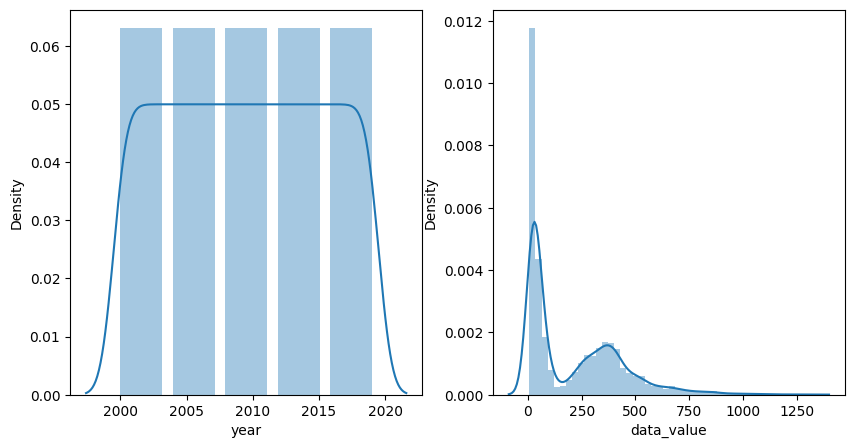

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.distplot(state_df[num_vars[0]])
plt.subplot(122)
sns.distplot(state_df[num_vars[1]])
plt.show()

Ta thấy ở thuộc tính `data_value`, dữ liệu tập trung ở mức dưới 1000. ở cột `year` các giá trị phân bố đều (ta sẽ bỏ qua cột này, tập trung vào cột data_value)

In [ ]:
# Xem xét thống kê mô tả đối với các cột numeric (trước khi xử lý)
state_df[num_vars].describe()

,year,data_value
count,13160.0000,13160.000000
mean,2009.5000,207.597984
std,5.7665,213.012845
min,2000.0000,7.083333
25%,2004.7500,27.333255
50%,2009.5000,86.512087
75%,2014.2500,364.879545
max,2019.0000,1303.300000


## I.3. Loại bỏ outliers (nếu cần)

Vẽ biểu đồ để tìm các outliers

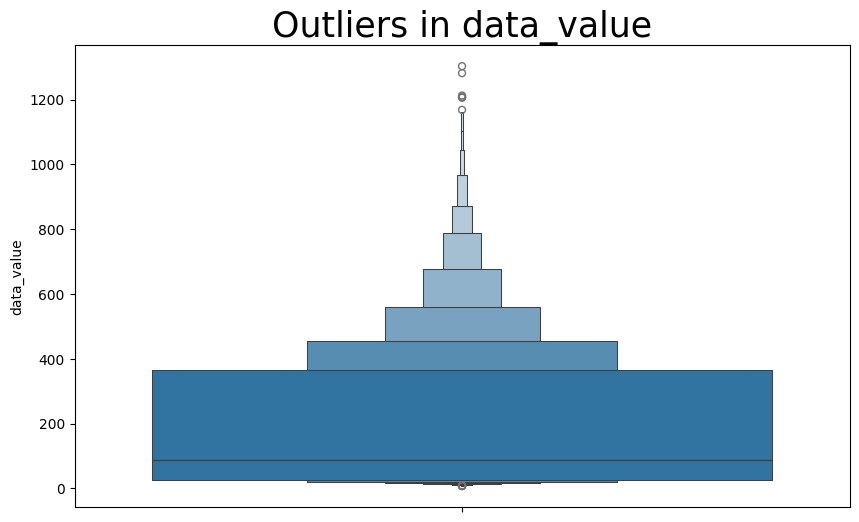

In [ ]:
plt.figure(figsize=(10,6))

sns.boxenplot(y='data_value',data=state_df)
plt.title('Outliers in {}'.format('data_value'),fontsize=25,fontweight=5)

plt.show()

Tuy nhiên, như đã giải thích và xử lý trước ở giai đoạn tiền xử lý và khám phá dữ liệu, các outlier do lỗi thống kê đã được xử lý, còn lại là những giá trị đúng, nên nhóm không xử lý loại bỏ.

# II. Chọn các đặc trưng để xây dựng mô hình
## II.1. Chuyển các cột dạng Categorical sang Numerical

Ta sẽ dùng hàm get_dummies để chuyển cột dạng Categorical sang Numerical theo phương pháp one-hot encoding

Lý do dùng: Vì các cột dạng categorical không có dạng order (có thứ tự) nên dùng one-hot encoding sẽ đem lại hiệu quả cao hơn so với phương pháp encoding khác.

In [ ]:
#Xem lại một đoạn dữ liệu của dataframe state_df
state_df.sample(10)

,locationabbr,year,age_group,race/ethnicityage_group,sex,data_value
963,AZ,2017,Ages 65+ years,Hispanic,Overall,414.441667
8626,NJ,2005,Ages 65+ years,Overall,Female,378.538095
3857,IL,2003,Ages 65+ years,Asian and Pacific Islander,Overall,273.250000
7369,MT,2006,Ages 65+ years,White,Overall,312.655000
6278,MI,2009,Ages 65+ years,Overall,Overall,388.441975
8350,NH,2002,Ages 65+ years,Overall,Male,386.150000
4230,IN,2007,Ages 35-64 years,Overall,Male,28.916279
12767,VA,2004,Ages 65+ years,Overall,Male,334.036364
11048,RI,2001,Ages 65+ years,Overall,Overall,393.340000
10026,OH,2015,Ages 35-64 years,Asian and Pacific Islander,Overall,15.992857


In [ ]:
df_new =state_df.drop(columns=['year','data_value'])
df_new = pd.get_dummies(df_new)
df_new['data_value'] =state_df['data_value']
df_new['year']=state_df['year']
df_new

,locationabbr_AK,locationabbr_AL,locationabbr_AR,locationabbr_AZ,locationabbr_CA,locationabbr_CO,locationabbr_CT,locationabbr_DC,locationabbr_DE,locationabbr_FL,...,race/ethnicityage_group_Asian and Pacific Islander,race/ethnicityage_group_Black,race/ethnicityage_group_Hispanic,race/ethnicityage_group_Overall,race/ethnicityage_group_White,sex_Female,sex_Male,sex_Overall,data_value,year
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,24.000000,2000
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,25.788889,2000
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,19.540000,2000
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,244.900000,2000
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,441.183333,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13155,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,42.400000,2019
13156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,576.530769,2019
13157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,766.308333,2019
13158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,667.307143,2019


## II.2 Bỏ đi những cột có tương quan thấp với data_value

In [ ]:
print(df_new.shape)
df_new.columns

(13160, 60)


Index(['locationabbr_AK', 'locationabbr_AL', 'locationabbr_AR',
       'locationabbr_AZ', 'locationabbr_CA', 'locationabbr_CO',
       'locationabbr_CT', 'locationabbr_DC', 'locationabbr_DE',
       'locationabbr_FL', 'locationabbr_GA', 'locationabbr_HI',
       'locationabbr_IA', 'locationabbr_ID', 'locationabbr_IL',
       'locationabbr_IN', 'locationabbr_KS', 'locationabbr_KY',
       'locationabbr_LA', 'locationabbr_MA', 'locationabbr_MD',
       'locationabbr_ME', 'locationabbr_MI', 'locationabbr_MN',
       'locationabbr_MO', 'locationabbr_MS', 'locationabbr_MT',
       'locationabbr_NC', 'locationabbr_ND', 'locationabbr_NE',
       'locationabbr_NH', 'locationabbr_NJ', 'locationabbr_NM',
       'locationabbr_NV', 'locationabbr_NY', 'locationabbr_OH',
       'locationabbr_OK', 'locationabbr_OR', 'locationabbr_PA',
       'locationabbr_RI', 'locationabbr_SC', 'locationabbr_SD',
       'locationabbr_TN', 'locationabbr_TX', 'locationabbr_UT',
       'locationabbr_VA', 'locationabbr_

Xem xét loại bỏ các cột có độ tương quan thấp với data_value (<0,01).

In [ ]:
# Tính toán ma trận tương quan 
corr_matrix = df_new.corr()

In [ ]:
#corr_matrix

In [ ]:
# Vẽ heatmap minh hoạ

#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
#plt.title('Heatmap of Correlation Matrix')
#plt.show()


In [ ]:
# Lọc các cột có độ tương quan ít hơn ngưỡng (0.01) với cột 'data_value'
corr_value = corr_matrix['data_value']
drop_columns = corr_value[abs(corr_value) < 0.01].index
df_new.drop(columns=drop_columns, inplace=True)

In [ ]:
print(df_new.shape)
df_new.columns

(13160, 41)


Index(['locationabbr_AL', 'locationabbr_CA', 'locationabbr_CO',
       'locationabbr_CT', 'locationabbr_DC', 'locationabbr_HI',
       'locationabbr_ID', 'locationabbr_KS', 'locationabbr_MA',
       'locationabbr_MD', 'locationabbr_ME', 'locationabbr_MI',
       'locationabbr_MN', 'locationabbr_MO', 'locationabbr_MS',
       'locationabbr_MT', 'locationabbr_NC', 'locationabbr_NE',
       'locationabbr_NH', 'locationabbr_NJ', 'locationabbr_NV',
       'locationabbr_OH', 'locationabbr_OK', 'locationabbr_PA',
       'locationabbr_SC', 'locationabbr_SD', 'locationabbr_TN',
       'locationabbr_TX', 'locationabbr_UT', 'locationabbr_VA',
       'locationabbr_VT', 'age_group_Ages 35-64 years',
       'age_group_Ages 65+ years',
       'race/ethnicityage_group_American Indian and Alaska Native',
       'race/ethnicityage_group_Asian and Pacific Islander',
       'race/ethnicityage_group_Black', 'race/ethnicityage_group_Hispanic',
       'race/ethnicityage_group_Overall', 'sex_Male', 'sex_Overa

Như vậy, ta sẽ sử dụng những đặc trưng như sau để xây dựng mô hình

In [ ]:
df_new.drop(columns='data_value').columns

Index(['locationabbr_AL', 'locationabbr_CA', 'locationabbr_CO',
       'locationabbr_CT', 'locationabbr_DC', 'locationabbr_HI',
       'locationabbr_ID', 'locationabbr_KS', 'locationabbr_MA',
       'locationabbr_MD', 'locationabbr_ME', 'locationabbr_MI',
       'locationabbr_MN', 'locationabbr_MO', 'locationabbr_MS',
       'locationabbr_MT', 'locationabbr_NC', 'locationabbr_NE',
       'locationabbr_NH', 'locationabbr_NJ', 'locationabbr_NV',
       'locationabbr_OH', 'locationabbr_OK', 'locationabbr_PA',
       'locationabbr_SC', 'locationabbr_SD', 'locationabbr_TN',
       'locationabbr_TX', 'locationabbr_UT', 'locationabbr_VA',
       'locationabbr_VT', 'age_group_Ages 35-64 years',
       'age_group_Ages 65+ years',
       'race/ethnicityage_group_American Indian and Alaska Native',
       'race/ethnicityage_group_Asian and Pacific Islander',
       'race/ethnicityage_group_Black', 'race/ethnicityage_group_Hispanic',
       'race/ethnicityage_group_Overall', 'sex_Male', 'sex_Overa

# III. Xây dựng mô hình

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import time

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score



In [ ]:
X = df_new.drop(columns=['data_value'])
y = df_new['data_value']

## III.1 Chuẩn hoá dữ liệu

Ta dùng phương pháp RobustScaler để giữ lại phân phối của dữ liệu, không ảnh hưởng nhiều bởi các giá trị ngoại lai (mà nhóm quyết định không loại bỏ). Nó sử dụng median và khoảng cách giữa quartile (IQR) để thực hiện chuẩn hóa.

Không dùng MinMaxScaler do dữ liệu còn có giá trị ngoại lai

In [ ]:
from sklearn.preprocessing import RobustScaler
# Sử dụng RobustScaler để chuẩn hóa các đặc trưng
scaler = RobustScaler()
scaler.fit_transform(X)

array([[ 0.,  0.,  0., ...,  1.,  1., -1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  1., -1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## III.2. Chia các tập train, test

Chia tập train/test với tỷ lệ là 75:25

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [ ]:
# Chia thành train, validation, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## III.3 Chọn các mô hình tốt nhất

Ta sẽ dùng phương pháp K Fold Cross Validation kết hợp với GridSearchCV để đánh giá và chọn ra các mô hình tốt nhất. 

Lý do dùng: Bởi vì tập dữ liệu khá nhỏ (656 rows), nếu chia ra các tập train/val/test thì không thật sự đo được độ hiệu quả của mô hình (vì mỗi tập quá ít dữ liệu). Dùng K Fold Cross Validation thì mọi phần trong tập train sẽ được dùng cho cả việc train và test, nhờ đó ta sẽ đánh giá chính xác hơn độ hiệu quả của mô hình.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Ta dùng điểm cross-validation đánh giá hiệu suất của mô hình trên dữ liệu mới mà nó chưa được huấn luyện.

1. **Giá trị trung bình và độ lệch chuẩn:**
   - **Giá trị trung bình (Mean Score):** Cho biết điểm trung bình của mô hình trên các fold. Nếu giá trị này cao, mô hình càng hiệu quả.
   - **Độ lệch chuẩn (Standard Deviation):** Mô tả mức độ biến động của các điểm trên các fold. Nếu độ lệch chuẩn lớn, có thể có sự bất ổn định trong hiệu suất của mô hình trên các tập dữ liệu khác nhau.
   
2. **Đánh giá sự ổn định của mô hình:**
   - Nếu độ lệch chuẩn lớn, có thể đề xuất rằng mô hình có thể không ổn định trên các tập dữ liệu khác nhau. Điều này có thể là dấu hiệu của overfitting, nghĩa là mô hình quá mức điều chỉnh cho dữ liệu huấn luyện cụ thể và không tổng quát hóa tốt trên dữ liệu mới.

Do đó, nhóm em tiến hành chạy thử và ghi nhận `mean score`, `std` của các mô hình, từ đó chọn ra 3 mô hình tốt nhất.

Ta sẽ chọn các thuật toán để kiểm tra là LinearRegression, Support Vector Regression, Decision Tree Regression, Ridge, Lasso, KNeighborsRegressor, RandomForestRegressor

In [ ]:
# Khởi tạo các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(), LinearRegression()),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNeighbors Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

param_grid = {
    'Linear Regression': {},
    'Polynomial Regression': {'polynomialfeatures__degree': [2, 3, 4]},
    'Decision Tree Regression': {'max_depth': [None, 10, 20, 30]},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'KNeighbors Regression': {'n_neighbors': [5, 10, 15]},
    'Random Forest Regression': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
}

# Tạo DataFrame để lưu kết quả
model_results_list = []

# Chạy cross-validation và grid_searchCV cho từng mô hình và ghi nhận kết quả
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Định nghĩa các siêu tham số muốn thử nghiệm
    param_grid_model = param_grid[model_name]
    
    # Sử dụng GridSearchCV với cross-validation
    grid_search = GridSearchCV(model, param_grid_model, cv=5)  # Chọn metric phù hợp với bài toán của bạn
    
    # Thực hiện tìm kiếm siêu tham số và cross-validation đồng thời trên tập huấn luyện
    grid_search.fit(X_train, y_train)
    
    # In ra kết quả tốt nhất cho từng mô hình
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    
    # Đánh giá mô hình trên tập xác nhận
    val_score = grid_search.best_estimator_.score(X_val, y_val)
    print("Validation Score: ", val_score)
    
    # Thêm kết quả vào list
    model_results_list.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_,
        'Validation Score': val_score
    })

# Tạo DataFrame từ list kết quả
model_results_df = pd.DataFrame(model_results_list)

model_results_df.sort_values(by='Validation Score', ascending=False, inplace=True)


Model: Linear Regression
Best Parameters:  {}
Best Score:  0.8553942132482473
Validation Score:  0.8582561792304928

Model: Polynomial Regression


In [ ]:
##### GỐC #####

# Khởi tạo các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(), LinearRegression()),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNeighbors Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

# Định nghĩa các siêu tham số muốn thử nghiệm
param_grid = {
    'Linear Regression': {},
    'Polynomial Regression': {'polynomialfeatures__degree': [2, 3, 4]},
    'Decision Tree Regression': {'max_depth': [None, 10, 20, 30]},
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'KNeighbors Regression': {'n_neighbors': [5, 10, 15]},
    'Random Forest Regression': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
}

# Tạo DataFrame để lưu kết quả
model_results_list =[]

# Chạy cross-validation cho từng mô hình và ghi nhận kết quả
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=7)
    mean_score = scores.mean()
    std_dev = scores.std()
    
    # Thêm kết quả vào list
    model_results_list.append({
        'Model': model_name,
        'Mean Score': mean_score,
        'Standard Deviation': std_dev
    })

# Tạo DataFrame từ list kết quả
model_results_df = pd.DataFrame(model_results_list)

model_results_df.sort_values(by= 'Mean Score', ascending= False, inplace=True)

In [ ]:
model_results_df

,Model,Mean Score,Standard Deviation
2,Decision Tree Regression,0.962227,0.002043
6,Random Forest Regression,0.962197,0.002038
5,KNeighbors Regression,0.958980,0.002741
1,Polynomial Regression,0.953589,0.002103
0,Linear Regression,0.866966,0.005644
3,Ridge Regression,0.866959,0.005802
4,Lasso Regression,0.846427,0.008761


**Biểu diễn kết quả nhận được dưới dạng đồ thị**

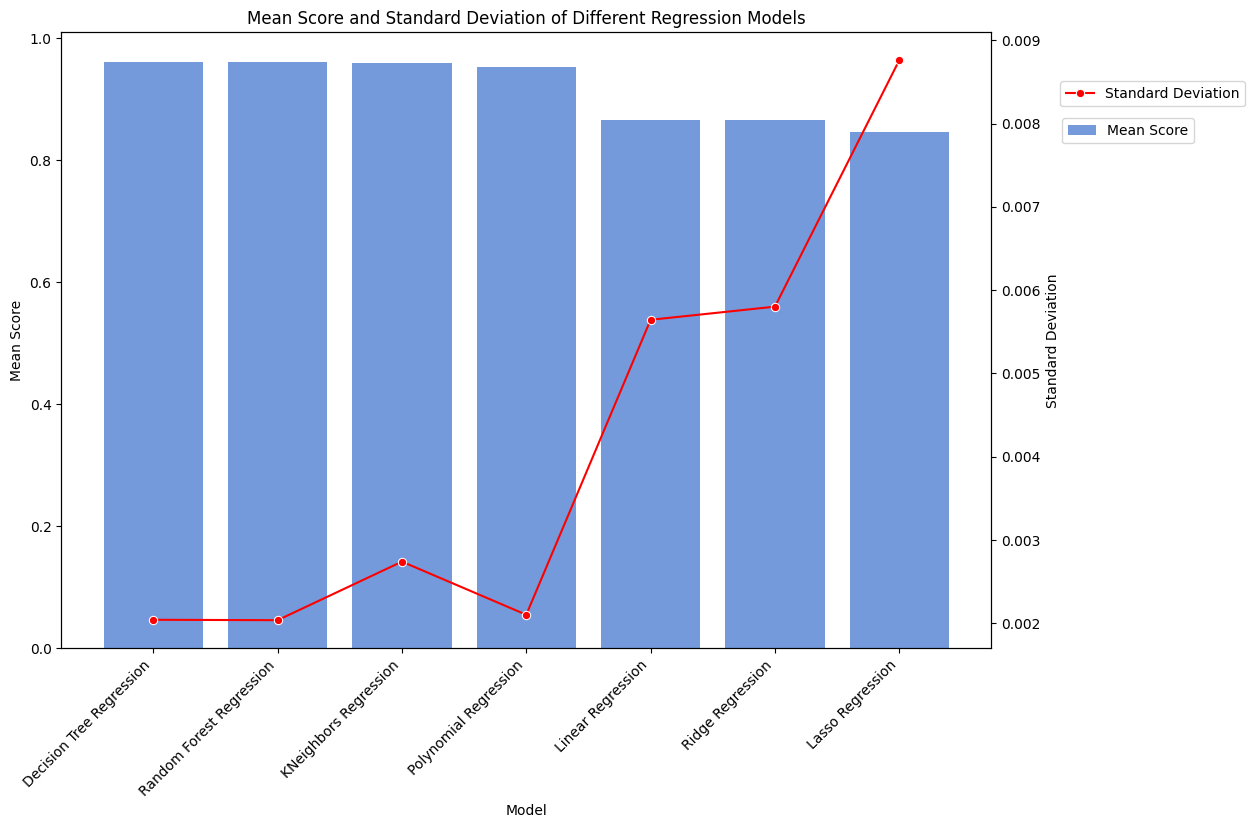

In [ ]:
# Vẽ biểu đồ cột và đường trên cùng 1 xbar
fig, ax = plt.subplots(figsize=(12, 8))

# Biểu đồ Mean Score (bar chart)
sns.barplot(x='Model', y='Mean Score', data=model_results_df, color='cornflowerblue', ax=ax, label='Mean Score')
ax.set_title('Mean Score and Standard Deviation of Different Regression Models')
ax.set_ylabel('Mean Score')

# Hiển thị tên model nghiên 45 độ
plt.xticks(rotation=45, ha='right')

# Vẽ đường cho Standard Deviation
ax2 = ax.twinx()
sns.lineplot(x='Model', y='Standard Deviation', data=model_results_df, color='red', marker='o', label='Standard Deviation', ax=ax2)
ax2.set_ylabel('Standard Deviation')

# Tắt grid
ax.grid(False)
ax2.grid(False)

# Hiển thị chú thích vị trí bên ngoài biểu đồ
ax2.legend(loc='center right', bbox_to_anchor=(1.28,0.9))
ax.legend(loc='center right', bbox_to_anchor=(1.225,0.84))

plt.show()


Dễ dàng nhận thấy 3 mô hình cho kết quả `mean score` tốt nhất là:
1. **Random Forest Regression**: Điểm trung bình cao (0.924) và độ lệch chuẩn thấp (0.03). Khá phù hợp với dữ liệu khi độ bất ổn định giữa các fold thấp.

2. **Decision Tree Regression**: Điểm trung bình tốt (0.91) nhưng độ lệch chuẩn ~ 0.05 (khá cao so với 2 mô hình còn lại)

3. **KNeighbors Regression**: Điểm trung bình tốt (0.876) và độ lệch chuẩn thấp ~ 0.039

## III.4 Tiến hành huấn luyện mô hình
Cho các mô hình này lần lượt chạy trên tập train và test để đo độ hiệu quả của chúng.

Ta sẽ tính các giá trị đo độ lỗi như sau:

- MAE: lỗi trị tuyệt đối trung bình
- MSE: lỗi bình phương trung bình
- RMSE: sai số bình phương trung bình căn
- R2_score: mức độ phù hợp của mô hình với tập dữ liệu

====== Linear Regression ======
====== Polynomial Regression ======
====== Decision Tree Regression ======
====== Ridge Regression ======
====== Lasso Regression ======
====== KNeighbors Regression ======
====== Random Forest Regression ======


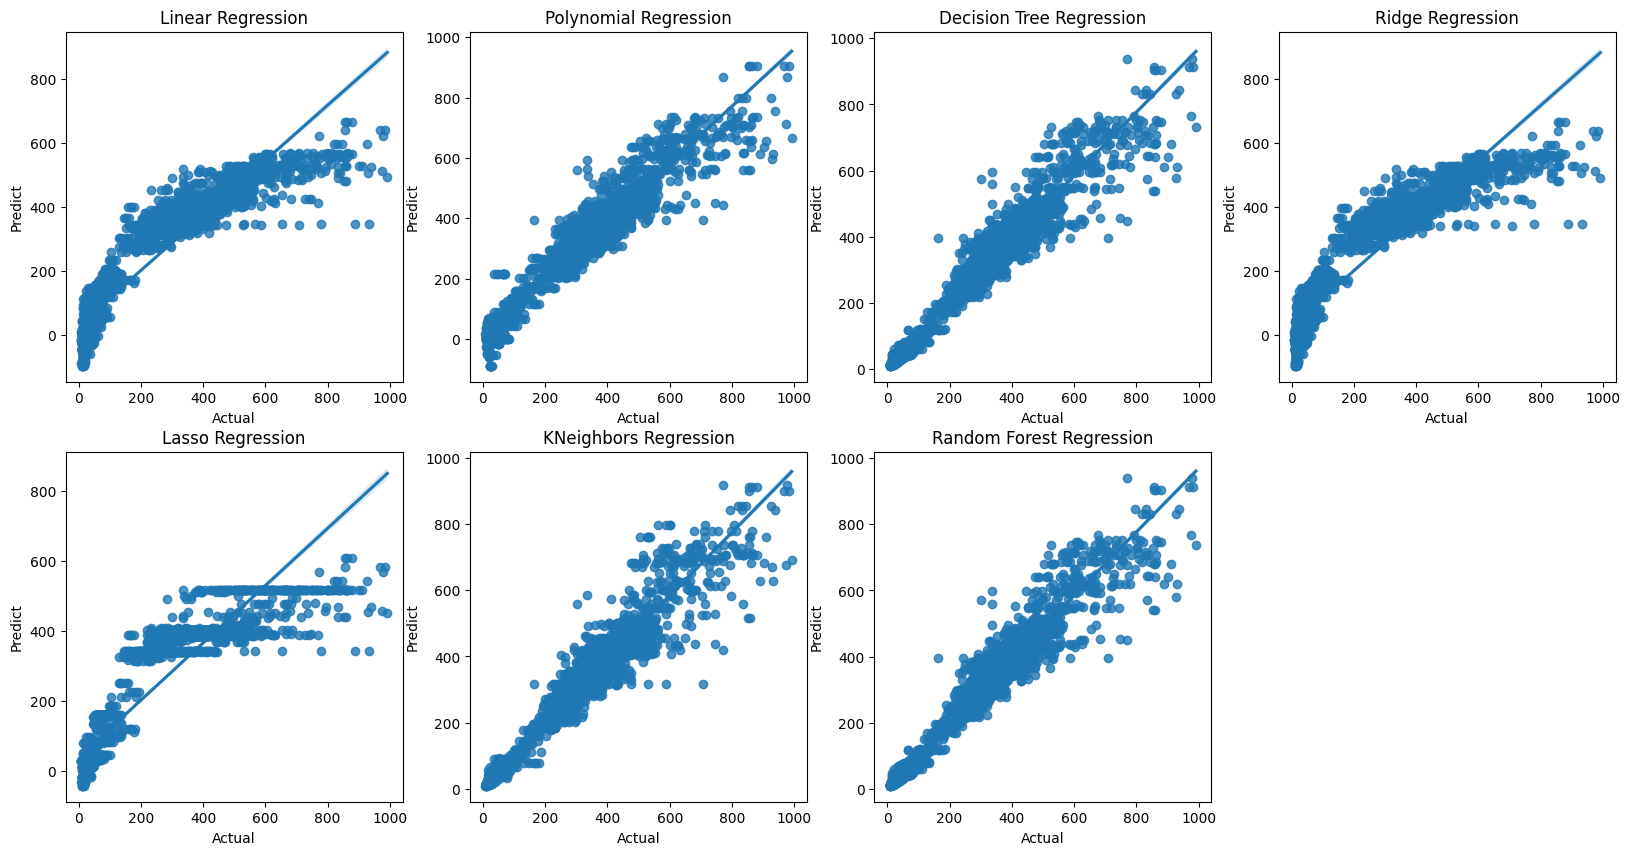

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    #'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNeighbors Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

train_results = []
test_results = []

count_model = 1

plt.figure(figsize = (20, 10))

# Vòng lặp qua từng mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    print(f"====== {model_name} ======")
    
    # Dự đoán trên tập huấn luyện
    y_pred_train = model.predict(X_train)
    score_train_mae = mean_absolute_error(y_train, y_pred_train).round(5)
    mse_score_train = mean_squared_error(y_train, y_pred_train).round(5)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False).round(5)
    score_r2_train = r2_score(y_train, y_pred_train).round(5)
    #accuracy_train = accuracy_score(y_train, y_pred_train).round(5)
    '''
    print("-----TRAIN-----")
    print("Train error (MAE): {}".format(score_train_mae))
    print("Train error (MSE): {}".format(mse_score_train))
    print("Train error (RMSE): {}".format(rmse_train))
    print("R2 score : {}".format(score_r2_train))
    #print("Accuracy score : {}".format(accuracy_train))
    '''
     # Ghi kết quả train vào danh sách
    train_results.append({
        'Model': model_name,
        'MAE': score_train_mae,
        'MSE': mse_score_train,
        'RMSE': rmse_train,
        'R2 Score': score_r2_train
    })
    
    # Dự đoán trên tập kiểm tra
    y_pred_test = model.predict(X_test)
    score_test_mae = mean_absolute_error(y_test, y_pred_test).round(5)
    mse_score_test = mean_squared_error(y_test, y_pred_test).round(5)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False).round(5)
    score_r2_test = r2_score(y_test, y_pred_test).round(5)
    #accuracy_test = accuracy_score(y_test, y_pred_test).round(5)
    '''
    print("-----TEST-----")
    print("Test error (MAE): {}".format(score_test_mae))
    print("Test error (MSE): {}".format(mse_score_test))
    print("Test error (RMSE): {}".format(rmse_test))
    print("R2 score : {}".format(score_r2_test))
    #print("Accuracy score : {}".format(accuracy_train))
    '''
   # Ghi kết quả test vào danh sách
    test_results.append({
        'Model': model_name,
        'MAE': score_test_mae,
        'MSE': mse_score_test,
        'RMSE': rmse_test,
        'R2 Score': score_r2_test
    })
    plt.subplot(2,4,count_model)
    # Vẽ biểu đồ so sánh giá trị thực tế và dự đoán trên tập kiểm tra
    sns.regplot(x=y_test, y=y_pred_test)
    plt.title(model_name)
    plt.xlabel('Actual')
    plt.ylabel('Predict')
    count_model+=1
    
plt.show()
# Chuyển danh sách kết quả train và test thành DataFrame
train_df = pd.DataFrame(train_results)
test_df = pd.DataFrame(test_results)

===

In [ ]:
train_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,53.51483,5635.44152,75.06958,0.86863
1,Polynomial Regression,26.81211,1819.25437,42.65272,0.95759
2,Decision Tree Regression,20.06419,1382.86994,37.18696,0.96776
3,Ridge Regression,53.42494,5634.89986,75.06597,0.86865
4,Lasso Regression,53.14483,6556.37178,80.97143,0.84717
5,KNeighbors Regression,20.99964,1597.19793,39.96496,0.96277
6,Random Forest Regression,20.06131,1383.78552,37.19927,0.96774


In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,53.94455,5991.29550,77.40346,0.86353
1,Polynomial Regression,29.68165,2263.76548,47.57904,0.94844
2,Decision Tree Regression,22.83423,1822.68715,42.69294,0.95848
3,Ridge Regression,53.84495,5990.80112,77.40027,0.86354
4,Lasso Regression,54.36614,7016.65203,83.76546,0.84018
5,KNeighbors Regression,23.93080,2043.48011,45.20487,0.95345
6,Random Forest Regression,22.82727,1819.41609,42.65461,0.95856


In [ ]:
# Lưu lại các thông số của mô hình Decision Tree Regression để triễn khai (deploy) mô hình.
import joblib
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train,y_train)
joblib.dump(model_DT, "./Deploy/DT_model.sav")

['./Deploy/DT_model.sav']

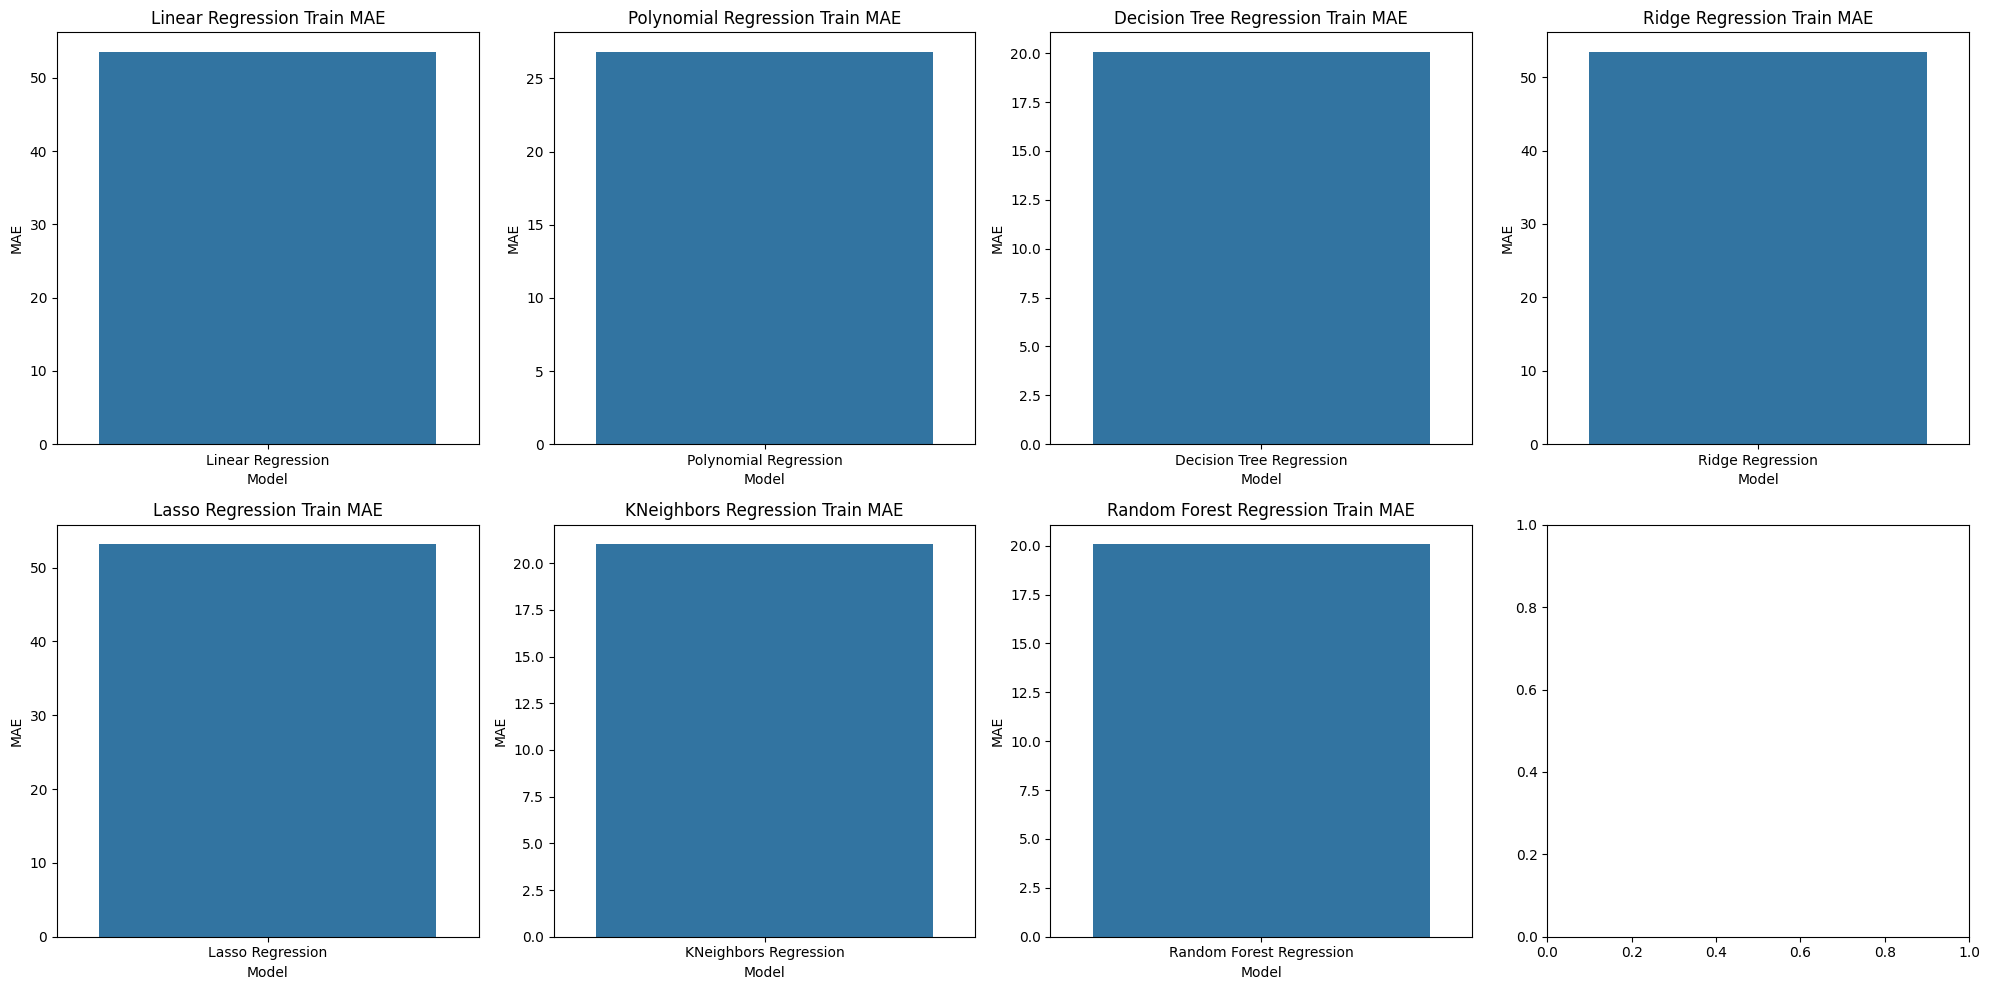

In [ ]:
# Chuyển danh sách kết quả train và test thành DataFrame
train_df = pd.DataFrame(train_results)
test_df = pd.DataFrame(test_results)

# Chọn số cột và số dòng trong lưới (ở đây là 2x4)
num_rows = 2
num_cols = 4

# Tạo lưới subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))

# Vòng lặp qua từng mô hình để vẽ đồ thị
for i, model_name in enumerate(models.keys()):
    # Lấy kết quả train và test tương ứng với mô hình
    train_result = train_df[train_df['Model'] == model_name]
    test_result = test_df[test_df['Model'] == model_name]

    # Tính toán vị trí của đồ thị trong lưới
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Vẽ đồ thị cho kết quả train
    sns.barplot(x='Model', y='MAE', data=train_result, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'{model_name} Train MAE')

# Tăng cường thông tin hiển thị
plt.tight_layout()
plt.show()
